# Customer Segmentation Project based on buying behaviour

1. [About the Dataset](#about-the-dataset) 
2. [Importing libraries](#importing-libraries)
3. [Loading the dataset](#loading-dataset)
4. [Preprocessing](#pre-processing)
5. [Visualization](#visualization)
6. [K-means](#k-means)
7. [Results](#interpreting-results)

## About the Dataset
The Mall Customers Dataset provides data on 200 individuals who visit a mall, including demographic information, annual income, and spending habits. This dataset is useful for exploratory data analysis, customer segmentation, and clustering tasks (e.g., K-means clustering).\
**Dataset Summary** 
* Rows: 200
* Columns: 5
<br>
For more detail check out [Here](hhttps://www.kaggle.com/datasets/abdallahwagih/mall-customers-segmentation)

## Importing Libraries


In [86]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns 

## Loading dataset

In [87]:
df=pd.read_csv('./Dataset/Mall_Customers.csv')

## Exploring the dataset

In [88]:
# first few rows

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [89]:
# number of rows & coloumns
df.shape

(200, 5)

In [90]:
# to know summary of data like coloumn , null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [91]:
# for stastical summary
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Pre-processing

### checking null Values
* result : no null values so no need to handles

In [92]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### checking duplicates
 * result : no duplicate values so no need to handle

In [93]:
# count duplicates
df.duplicated().sum()

0

### Checking unique values 

In [94]:
df['Genre'].unique()

array(['Male', 'Female'], dtype=object)

### Dropping coloumns 
e.g customer iD as have no impact on results

In [95]:
df.drop('CustomerID',axis=1,inplace=True)

In [96]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Encoding 
convert Genre (Male/Female) to numeric:

In [97]:
# converting categorical data to numerical
df['Genre'] = df['Genre'].map({'Male':1,'Female':0})


In [98]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Standard Scaling

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled


array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

## Visualization
* histogram
* barplot
* scatterplot

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

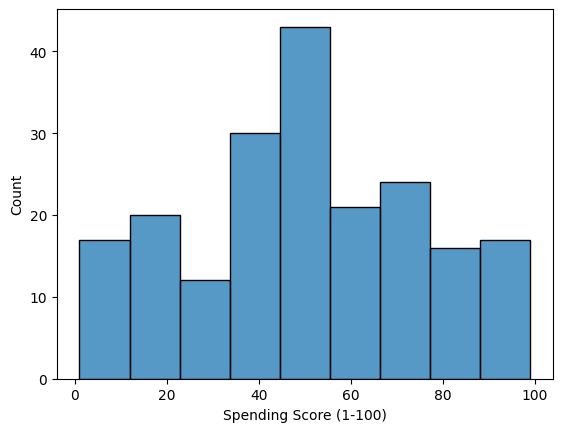

In [101]:
sns.histplot(df['Spending Score (1-100)'])

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

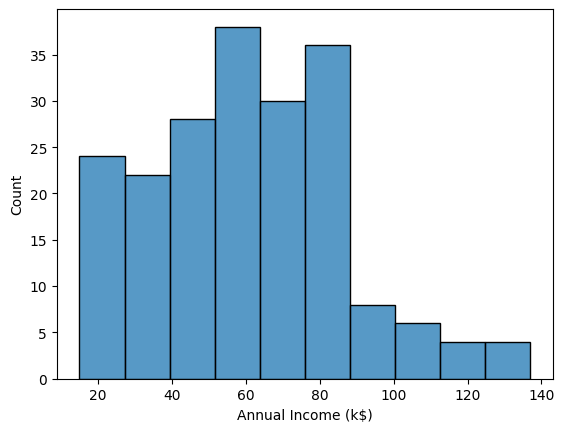

In [102]:
sns.histplot(df['Annual Income (k$)'])

<Axes: xlabel='Genre'>

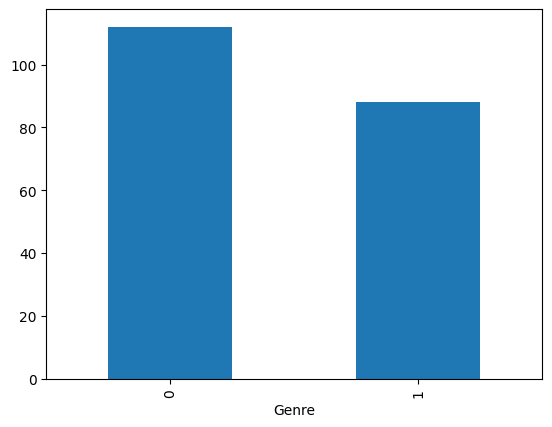

In [103]:
df['Genre'].value_counts().plot(kind='bar')


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

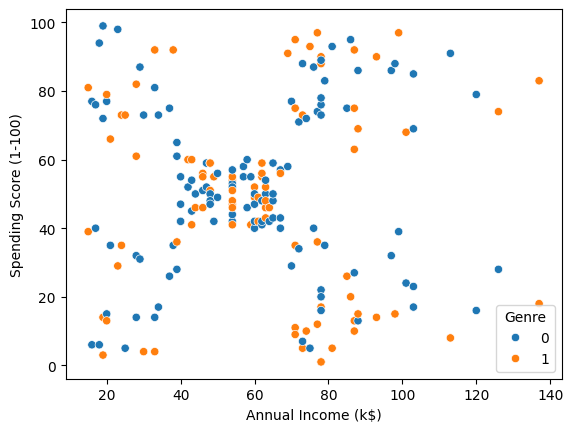

In [104]:
#scatter plot
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Genre',data=df)

## K-means


In [105]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


### Select the features for clustering
Since we have four columns (Genre, Age, Annual Income (k$), Spending Score (1-100)), we'll usually choose relevant columns.
Let's cluster based on **Annual Income and Spending Score**

In [ ]:

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values


###  Find the optimal number of clusters (Elbow Method)
"elbow point" (where curve bends) tells the best number of clusters (usually 3–5).

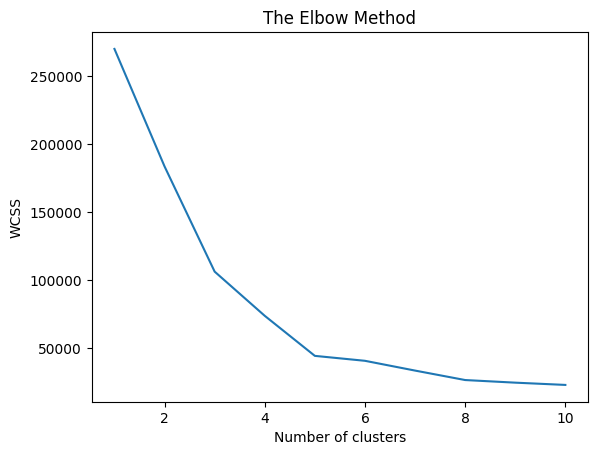

In [121]:
import matplotlib.pyplot as plt

wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### 4: Apply K-Means

In [122]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


### Visualize the Clusters

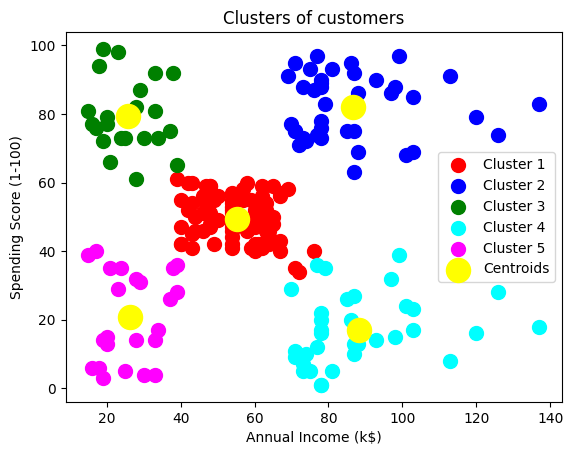

In [123]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


## interpreting Results

Each colored group (Cluster 1, Cluster 2, etc.) in the plot represents customers who are similar to each other based on:
* Their Annual Income (x-axis)
* Their Spending Score (y-axis)

**Cluster near high income and high spending score**:
→ These are wealthy and big spenders.
→ Likely VIP customers, very valuable to the mall.

**Cluster near low income but high spending score:**
→ Low income but high spenders.
→ Maybe young students, impulsive buyers.

**Cluster near high income but low spending score:**
→ Wealthy but cautious spenders.
→ They have money but don’t spend much in the mall.

**Cluster near low income and low spending score:**
→ Low income and low spenders.
→ Maybe less interesting for premium marketing.

**Middle income, middle spenders:**
→ Average customers. Maybe families, working professionals.

Key Business Insights :
- **Who are your best customers?** (High income + High spending)
- **Who might need special discounts?** (Low income but good spending)
- **Who needs different marketing?** (High income but low spending)

Clustering helps you understand different customer types, and you can design different marketing strategies for each group!

-------------------

## Saving model


In [124]:
import joblib

# Save the model
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']